# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [23]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper
import numpy as np

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

In [39]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

AttributeError: 'numpy.ndarray' object has no attribute 'mask'

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

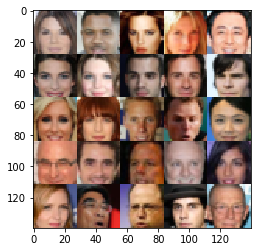

In [25]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [26]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [27]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, shape=[None, image_width, image_height, \
                        image_channels], name='input_real')
    input_z = tf.placeholder(tf.float32, shape=[None, z_dim], name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [28]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    # TODO: Implement Function
    alpha = 0.1
    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # First convolutional layer
        conv1 = tf.layers.conv2d(images, 56, 5, 2, 'SAME')
        conv1 = tf.maximum(alpha*conv1, conv1)
        
        # Second convolutional layer
        conv2 = tf.layers.conv2d(conv1, 112, 5, 2, 'SAME')
        conv2 = tf.layers.batch_normalization(conv2, training=True)
        conv2 = tf.maximum(alpha*conv2, conv2)
        
        # Third convolutional layer
        conv3 = tf.layers.conv2d(conv2, 224, 5, 2, 'SAME')
        conv3 = tf.layers.batch_normalization(conv3, training=True)
        conv3 = tf.maximum(alpha*conv3, conv3)
        
        # Output fully connected layer
        flat   = tf.reshape(conv3, (-1, 4*4*224))
        logits = tf.layers.dense(flat, 1)
        
        ### REVIEWER TIP ####
        # Apply dropout so that discriminator 
        # is less prone to learning the data distribution
        logits = tf.layers.dropout(logits, rate=0.5)
        
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [29]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.1
    
    with tf.variable_scope('generator', reuse=not(is_train)):
        
        # Input fully connected layer
        fully = tf.layers.dense(z, 7*7*112)
        fully = tf.reshape(fully, (-1, 7, 7, 112))
        fully = tf.layers.batch_normalization(fully, training=is_train)
        fully = tf.maximum(alpha*fully, fully)
        
        # First convolutional layer
        conv1 = tf.layers.conv2d_transpose(fully, 56, 5, 2, 'SAME')
        conv1 = tf.layers.batch_normalization(conv1, training=is_train)
        conv1 = tf.maximum(alpha*conv1, conv1)
        
        # Output convolutional layer
        conv2 = tf.layers.conv2d_transpose(conv1, out_channel_dim, 5, 2, 'SAME')
        out = tf.tanh(conv2)

    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [30]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    # Generator model
    g_model = generator(input_z, out_channel_dim)
    
    # Discriminator models
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, True)
    
    # Discriminator losses
    #### REVIEWER TIP ####
    # Use 'One Sided Label Smoothing' on labels
    d_loss_real = tf.reduce_mean( \
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, \
        labels=tf.ones_like(d_logits_real)*np.random.uniform(0.7, 1.2)))
    d_loss_fake=tf.reduce_mean( \
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, \
        labels=tf.zeros_like(d_logits_fake)*np.random.uniform(0.0, 0.3)))
    d_loss = d_loss_real + d_loss_fake
    
    # Generator loss
    g_loss = tf.reduce_mean( \
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [31]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get discriminator and generator variables
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Run optimizer
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt    
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [32]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [33]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)

    steps = 0
    print_every = 10
    show_every = 100

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model

                steps += 1
                
                #### REVIEWER SUGGESTION ####
                # Normalize input to be between -1 and 1 to match generator's images
                batch_images = batch_images*2
                
                # Get input noise
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
            
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval(feed_dict={input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval(feed_dict={input_z: batch_z})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, batch_size, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [36]:
batch_size = 128
z_dim = 128
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

Epoch 1/2... Discriminator Loss: 1.0330... Generator Loss: 7.7374
Epoch 1/2... Discriminator Loss: 2.7107... Generator Loss: 0.2164
Epoch 1/2... Discriminator Loss: 0.8087... Generator Loss: 2.1562
Epoch 1/2... Discriminator Loss: 1.7217... Generator Loss: 0.5252
Epoch 1/2... Discriminator Loss: 1.2230... Generator Loss: 0.8578
Epoch 1/2... Discriminator Loss: 1.4890... Generator Loss: 3.5555
Epoch 1/2... Discriminator Loss: 1.0316... Generator Loss: 1.2641
Epoch 1/2... Discriminator Loss: 0.9677... Generator Loss: 1.8554
Epoch 1/2... Discriminator Loss: 0.9956... Generator Loss: 1.8168
Epoch 1/2... Discriminator Loss: 0.9751... Generator Loss: 1.5989


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Discriminator Loss: 1.0370... Generator Loss: 1.8772
Epoch 1/2... Discriminator Loss: 1.0261... Generator Loss: 1.3624
Epoch 1/2... Discriminator Loss: 0.9615... Generator Loss: 1.4944
Epoch 1/2... Discriminator Loss: 1.0837... Generator Loss: 1.2645
Epoch 1/2... Discriminator Loss: 0.9866... Generator Loss: 2.0963
Epoch 1/2... Discriminator Loss: 0.9691... Generator Loss: 1.2887
Epoch 1/2... Discriminator Loss: 0.9356... Generator Loss: 1.3559
Epoch 1/2... Discriminator Loss: 1.2303... Generator Loss: 2.5796
Epoch 1/2... Discriminator Loss: 1.0049... Generator Loss: 1.2091
Epoch 1/2... Discriminator Loss: 1.0245... Generator Loss: 2.5630


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Discriminator Loss: 0.9631... Generator Loss: 1.3864
Epoch 1/2... Discriminator Loss: 0.8852... Generator Loss: 1.7238
Epoch 1/2... Discriminator Loss: 1.0238... Generator Loss: 1.5029
Epoch 1/2... Discriminator Loss: 0.9262... Generator Loss: 1.5606
Epoch 1/2... Discriminator Loss: 0.8841... Generator Loss: 1.9928
Epoch 1/2... Discriminator Loss: 1.1816... Generator Loss: 1.1993
Epoch 1/2... Discriminator Loss: 0.9095... Generator Loss: 1.7248
Epoch 1/2... Discriminator Loss: 0.8815... Generator Loss: 1.6642
Epoch 1/2... Discriminator Loss: 0.8729... Generator Loss: 1.5534
Epoch 1/2... Discriminator Loss: 1.4628... Generator Loss: 0.7153


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Discriminator Loss: 0.9857... Generator Loss: 1.2754
Epoch 1/2... Discriminator Loss: 0.8675... Generator Loss: 2.0418
Epoch 1/2... Discriminator Loss: 1.3428... Generator Loss: 0.9643
Epoch 1/2... Discriminator Loss: 0.9055... Generator Loss: 1.4466
Epoch 1/2... Discriminator Loss: 0.9561... Generator Loss: 1.3275
Epoch 1/2... Discriminator Loss: 1.0919... Generator Loss: 1.1999
Epoch 1/2... Discriminator Loss: 0.8468... Generator Loss: 1.6688
Epoch 1/2... Discriminator Loss: 1.4162... Generator Loss: 3.2786
Epoch 1/2... Discriminator Loss: 0.8773... Generator Loss: 1.9776
Epoch 1/2... Discriminator Loss: 0.8921... Generator Loss: 1.5952


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Discriminator Loss: 1.2598... Generator Loss: 2.6331
Epoch 1/2... Discriminator Loss: 0.8846... Generator Loss: 1.6416
Epoch 1/2... Discriminator Loss: 0.8351... Generator Loss: 1.8903
Epoch 1/2... Discriminator Loss: 1.4739... Generator Loss: 0.7209
Epoch 1/2... Discriminator Loss: 0.8938... Generator Loss: 1.5104
Epoch 1/2... Discriminator Loss: 0.8884... Generator Loss: 1.7707
Epoch 2/2... Discriminator Loss: 0.8520... Generator Loss: 1.9774
Epoch 2/2... Discriminator Loss: 1.0996... Generator Loss: 1.0630
Epoch 2/2... Discriminator Loss: 1.5643... Generator Loss: 2.7791
Epoch 2/2... Discriminator Loss: 1.0232... Generator Loss: 1.1947


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 0.9269... Generator Loss: 1.4824
Epoch 2/2... Discriminator Loss: 1.2971... Generator Loss: 0.8075
Epoch 2/2... Discriminator Loss: 1.0396... Generator Loss: 1.9249
Epoch 2/2... Discriminator Loss: 0.9852... Generator Loss: 1.2266
Epoch 2/2... Discriminator Loss: 1.1689... Generator Loss: 1.0393
Epoch 2/2... Discriminator Loss: 0.9414... Generator Loss: 1.3538
Epoch 2/2... Discriminator Loss: 0.8225... Generator Loss: 2.0825
Epoch 2/2... Discriminator Loss: 0.8279... Generator Loss: 1.9111
Epoch 2/2... Discriminator Loss: 1.5708... Generator Loss: 0.7209
Epoch 2/2... Discriminator Loss: 1.0263... Generator Loss: 1.1703


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 0.9515... Generator Loss: 1.4976
Epoch 2/2... Discriminator Loss: 0.9521... Generator Loss: 2.0065
Epoch 2/2... Discriminator Loss: 0.9577... Generator Loss: 1.3033
Epoch 2/2... Discriminator Loss: 0.9770... Generator Loss: 1.8939
Epoch 2/2... Discriminator Loss: 0.9295... Generator Loss: 1.3740
Epoch 2/2... Discriminator Loss: 0.8727... Generator Loss: 1.5179
Epoch 2/2... Discriminator Loss: 1.0961... Generator Loss: 1.9312
Epoch 2/2... Discriminator Loss: 0.9018... Generator Loss: 1.5461
Epoch 2/2... Discriminator Loss: 0.7737... Generator Loss: 1.9886
Epoch 2/2... Discriminator Loss: 0.9010... Generator Loss: 2.2753


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 1.0231... Generator Loss: 1.3851
Epoch 2/2... Discriminator Loss: 1.0136... Generator Loss: 1.1643
Epoch 2/2... Discriminator Loss: 0.9197... Generator Loss: 1.3936
Epoch 2/2... Discriminator Loss: 0.9981... Generator Loss: 1.1727
Epoch 2/2... Discriminator Loss: 1.0659... Generator Loss: 1.2115
Epoch 2/2... Discriminator Loss: 1.1286... Generator Loss: 0.9700
Epoch 2/2... Discriminator Loss: 1.1406... Generator Loss: 1.0623
Epoch 2/2... Discriminator Loss: 0.9667... Generator Loss: 1.2857
Epoch 2/2... Discriminator Loss: 0.8250... Generator Loss: 2.2468
Epoch 2/2... Discriminator Loss: 3.3538... Generator Loss: 5.6798


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 1.0293... Generator Loss: 1.3850
Epoch 2/2... Discriminator Loss: 0.9996... Generator Loss: 1.4010
Epoch 2/2... Discriminator Loss: 0.9219... Generator Loss: 1.5092
Epoch 2/2... Discriminator Loss: 0.8572... Generator Loss: 1.9838
Epoch 2/2... Discriminator Loss: 1.3511... Generator Loss: 3.0340
Epoch 2/2... Discriminator Loss: 0.9946... Generator Loss: 1.1871
Epoch 2/2... Discriminator Loss: 0.9325... Generator Loss: 1.3632
Epoch 2/2... Discriminator Loss: 0.8104... Generator Loss: 1.8281
Epoch 2/2... Discriminator Loss: 1.1354... Generator Loss: 0.9860
Epoch 2/2... Discriminator Loss: 1.4044... Generator Loss: 2.8679


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 0.9314... Generator Loss: 1.6092
Epoch 2/2... Discriminator Loss: 1.0005... Generator Loss: 2.4425
Epoch 2/2... Discriminator Loss: 0.9417... Generator Loss: 1.3809


### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.1421... Generator Loss: 2.7422
Epoch 1/1... Discriminator Loss: 0.1352... Generator Loss: 2.8888
Epoch 1/1... Discriminator Loss: 0.0858... Generator Loss: 3.4968
Epoch 1/1... Discriminator Loss: 0.0876... Generator Loss: 3.6083
Epoch 1/1... Discriminator Loss: 0.0737... Generator Loss: 3.4568
Epoch 1/1... Discriminator Loss: 0.0613... Generator Loss: 3.8375
Epoch 1/1... Discriminator Loss: 0.0525... Generator Loss: 4.1673
Epoch 1/1... Discriminator Loss: 0.0634... Generator Loss: 3.5883
Epoch 1/1... Discriminator Loss: 0.0559... Generator Loss: 4.0539
Epoch 1/1... Discriminator Loss: 0.0507... Generator Loss: 3.9772


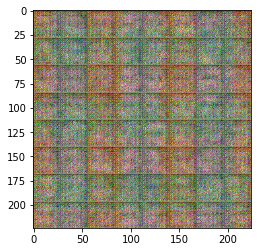

Epoch 1/1... Discriminator Loss: 0.0531... Generator Loss: 3.9515
Epoch 1/1... Discriminator Loss: 0.0462... Generator Loss: 4.2923
Epoch 1/1... Discriminator Loss: 0.1774... Generator Loss: 9.3719
Epoch 1/1... Discriminator Loss: 0.0745... Generator Loss: 3.8407
Epoch 1/1... Discriminator Loss: 0.1156... Generator Loss: 3.3353
Epoch 1/1... Discriminator Loss: 0.1628... Generator Loss: 3.9176
Epoch 1/1... Discriminator Loss: 0.2294... Generator Loss: 2.3777
Epoch 1/1... Discriminator Loss: 0.2182... Generator Loss: 2.5136
Epoch 1/1... Discriminator Loss: 0.1323... Generator Loss: 4.3785
Epoch 1/1... Discriminator Loss: 1.0094... Generator Loss: 0.6921


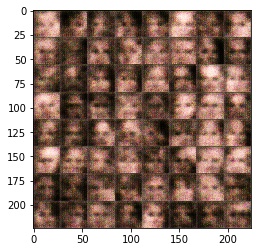

Epoch 1/1... Discriminator Loss: 0.1974... Generator Loss: 2.4876
Epoch 1/1... Discriminator Loss: 0.2466... Generator Loss: 2.2892
Epoch 1/1... Discriminator Loss: 0.2386... Generator Loss: 2.3978
Epoch 1/1... Discriminator Loss: 0.1209... Generator Loss: 4.5830
Epoch 1/1... Discriminator Loss: 0.1636... Generator Loss: 2.5992
Epoch 1/1... Discriminator Loss: 0.1938... Generator Loss: 2.3056
Epoch 1/1... Discriminator Loss: 0.2800... Generator Loss: 1.8551
Epoch 1/1... Discriminator Loss: 0.1680... Generator Loss: 2.7692
Epoch 1/1... Discriminator Loss: 0.1979... Generator Loss: 2.7257
Epoch 1/1... Discriminator Loss: 0.1327... Generator Loss: 3.0036


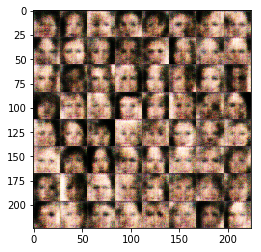

Epoch 1/1... Discriminator Loss: 0.6414... Generator Loss: 6.3731
Epoch 1/1... Discriminator Loss: 0.1258... Generator Loss: 3.0781
Epoch 1/1... Discriminator Loss: 0.1135... Generator Loss: 3.1405
Epoch 1/1... Discriminator Loss: 0.1741... Generator Loss: 3.3816
Epoch 1/1... Discriminator Loss: 0.2226... Generator Loss: 2.1875
Epoch 1/1... Discriminator Loss: 0.3256... Generator Loss: 2.0329
Epoch 1/1... Discriminator Loss: 0.2346... Generator Loss: 2.7508
Epoch 1/1... Discriminator Loss: 0.2742... Generator Loss: 2.3192
Epoch 1/1... Discriminator Loss: 0.3106... Generator Loss: 2.5718
Epoch 1/1... Discriminator Loss: 0.3364... Generator Loss: 3.4643


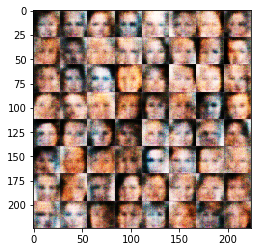

Epoch 1/1... Discriminator Loss: 0.2545... Generator Loss: 2.3881
Epoch 1/1... Discriminator Loss: 0.3030... Generator Loss: 2.1711
Epoch 1/1... Discriminator Loss: 0.2407... Generator Loss: 2.6758
Epoch 1/1... Discriminator Loss: 0.2213... Generator Loss: 2.9329
Epoch 1/1... Discriminator Loss: 0.5135... Generator Loss: 1.1788
Epoch 1/1... Discriminator Loss: 0.2345... Generator Loss: 2.7505
Epoch 1/1... Discriminator Loss: 0.1781... Generator Loss: 2.7179
Epoch 1/1... Discriminator Loss: 0.2550... Generator Loss: 2.1113
Epoch 1/1... Discriminator Loss: 0.2568... Generator Loss: 2.2476
Epoch 1/1... Discriminator Loss: 0.7303... Generator Loss: 2.0217


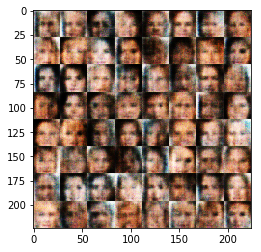

Epoch 1/1... Discriminator Loss: 0.1288... Generator Loss: 2.7664
Epoch 1/1... Discriminator Loss: 0.2207... Generator Loss: 3.0496
Epoch 1/1... Discriminator Loss: 0.2226... Generator Loss: 2.1435
Epoch 1/1... Discriminator Loss: 0.1738... Generator Loss: 2.6770
Epoch 1/1... Discriminator Loss: 0.2243... Generator Loss: 2.5276
Epoch 1/1... Discriminator Loss: 0.2786... Generator Loss: 2.0188
Epoch 1/1... Discriminator Loss: 0.3105... Generator Loss: 2.2964
Epoch 1/1... Discriminator Loss: 0.3783... Generator Loss: 2.1635
Epoch 1/1... Discriminator Loss: 0.2389... Generator Loss: 2.5928
Epoch 1/1... Discriminator Loss: 0.2099... Generator Loss: 2.4643


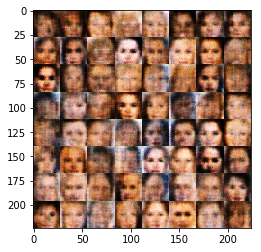

Epoch 1/1... Discriminator Loss: 0.4866... Generator Loss: 1.2357
Epoch 1/1... Discriminator Loss: 0.2019... Generator Loss: 2.6202
Epoch 1/1... Discriminator Loss: 0.3050... Generator Loss: 1.7969
Epoch 1/1... Discriminator Loss: 0.2047... Generator Loss: 2.5734
Epoch 1/1... Discriminator Loss: 0.1229... Generator Loss: 3.0827
Epoch 1/1... Discriminator Loss: 0.2040... Generator Loss: 2.9883
Epoch 1/1... Discriminator Loss: 0.6004... Generator Loss: 4.5034
Epoch 1/1... Discriminator Loss: 0.4816... Generator Loss: 2.8615
Epoch 1/1... Discriminator Loss: 0.3116... Generator Loss: 2.0110
Epoch 1/1... Discriminator Loss: 0.2900... Generator Loss: 2.1403


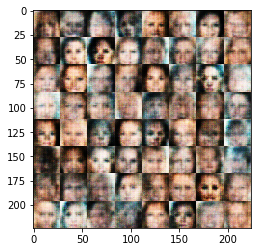

Epoch 1/1... Discriminator Loss: 0.6816... Generator Loss: 0.9815
Epoch 1/1... Discriminator Loss: 0.8281... Generator Loss: 0.8236
Epoch 1/1... Discriminator Loss: 0.2894... Generator Loss: 1.9657
Epoch 1/1... Discriminator Loss: 0.2241... Generator Loss: 2.7036
Epoch 1/1... Discriminator Loss: 0.3202... Generator Loss: 2.1295
Epoch 1/1... Discriminator Loss: 0.4202... Generator Loss: 2.2306
Epoch 1/1... Discriminator Loss: 0.2942... Generator Loss: 3.4298
Epoch 1/1... Discriminator Loss: 0.9031... Generator Loss: 0.7483
Epoch 1/1... Discriminator Loss: 0.3720... Generator Loss: 1.6918
Epoch 1/1... Discriminator Loss: 0.3693... Generator Loss: 1.9587


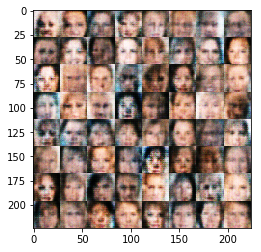

Epoch 1/1... Discriminator Loss: 0.3861... Generator Loss: 2.0547
Epoch 1/1... Discriminator Loss: 0.3570... Generator Loss: 2.3738
Epoch 1/1... Discriminator Loss: 0.4039... Generator Loss: 2.7707
Epoch 1/1... Discriminator Loss: 0.4762... Generator Loss: 1.6467
Epoch 1/1... Discriminator Loss: 0.5516... Generator Loss: 1.2759
Epoch 1/1... Discriminator Loss: 0.2986... Generator Loss: 2.2517
Epoch 1/1... Discriminator Loss: 0.8501... Generator Loss: 0.7446
Epoch 1/1... Discriminator Loss: 0.5579... Generator Loss: 2.5599
Epoch 1/1... Discriminator Loss: 0.3495... Generator Loss: 2.3170
Epoch 1/1... Discriminator Loss: 0.5818... Generator Loss: 1.2216


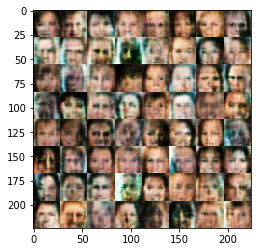

Epoch 1/1... Discriminator Loss: 0.3933... Generator Loss: 1.8165
Epoch 1/1... Discriminator Loss: 0.4717... Generator Loss: 2.0664
Epoch 1/1... Discriminator Loss: 0.5198... Generator Loss: 1.2708
Epoch 1/1... Discriminator Loss: 0.3616... Generator Loss: 2.2815
Epoch 1/1... Discriminator Loss: 0.3015... Generator Loss: 2.2893
Epoch 1/1... Discriminator Loss: 0.8518... Generator Loss: 0.7474
Epoch 1/1... Discriminator Loss: 0.5059... Generator Loss: 1.3359
Epoch 1/1... Discriminator Loss: 0.6026... Generator Loss: 1.1570
Epoch 1/1... Discriminator Loss: 0.3785... Generator Loss: 1.5998
Epoch 1/1... Discriminator Loss: 0.2798... Generator Loss: 2.3735


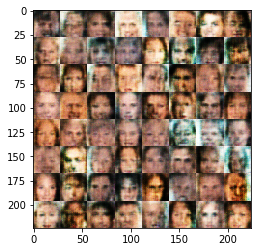

Epoch 1/1... Discriminator Loss: 0.2713... Generator Loss: 1.9804
Epoch 1/1... Discriminator Loss: 0.5877... Generator Loss: 1.1860
Epoch 1/1... Discriminator Loss: 0.3822... Generator Loss: 2.0202
Epoch 1/1... Discriminator Loss: 0.3715... Generator Loss: 1.7615
Epoch 1/1... Discriminator Loss: 0.5195... Generator Loss: 1.2698
Epoch 1/1... Discriminator Loss: 0.3339... Generator Loss: 2.3113
Epoch 1/1... Discriminator Loss: 0.3734... Generator Loss: 2.2523
Epoch 1/1... Discriminator Loss: 0.5235... Generator Loss: 1.3228
Epoch 1/1... Discriminator Loss: 0.3868... Generator Loss: 2.4937
Epoch 1/1... Discriminator Loss: 0.3413... Generator Loss: 1.9873


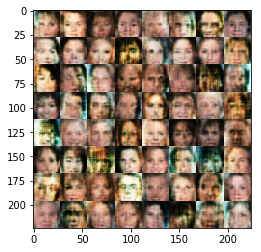

Epoch 1/1... Discriminator Loss: 0.3800... Generator Loss: 1.8087
Epoch 1/1... Discriminator Loss: 0.3528... Generator Loss: 2.9768
Epoch 1/1... Discriminator Loss: 0.4088... Generator Loss: 1.6471
Epoch 1/1... Discriminator Loss: 0.4663... Generator Loss: 1.6132
Epoch 1/1... Discriminator Loss: 0.4445... Generator Loss: 1.6865
Epoch 1/1... Discriminator Loss: 0.4604... Generator Loss: 1.5107
Epoch 1/1... Discriminator Loss: 0.4828... Generator Loss: 1.5286
Epoch 1/1... Discriminator Loss: 1.0137... Generator Loss: 3.6486
Epoch 1/1... Discriminator Loss: 0.4756... Generator Loss: 2.0248
Epoch 1/1... Discriminator Loss: 0.4834... Generator Loss: 1.8470


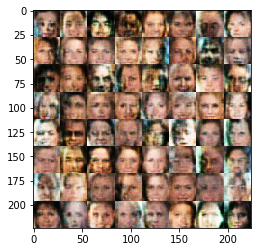

Epoch 1/1... Discriminator Loss: 0.4209... Generator Loss: 2.0408
Epoch 1/1... Discriminator Loss: 0.6968... Generator Loss: 2.9158
Epoch 1/1... Discriminator Loss: 0.5294... Generator Loss: 1.3041
Epoch 1/1... Discriminator Loss: 0.3749... Generator Loss: 2.0457
Epoch 1/1... Discriminator Loss: 0.3030... Generator Loss: 2.2731
Epoch 1/1... Discriminator Loss: 0.4292... Generator Loss: 2.2744
Epoch 1/1... Discriminator Loss: 1.0701... Generator Loss: 3.3694
Epoch 1/1... Discriminator Loss: 0.4178... Generator Loss: 2.7860
Epoch 1/1... Discriminator Loss: 0.2785... Generator Loss: 2.6860
Epoch 1/1... Discriminator Loss: 0.4407... Generator Loss: 1.4851


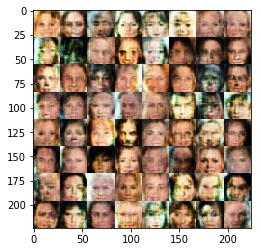

Epoch 1/1... Discriminator Loss: 0.4652... Generator Loss: 2.1606
Epoch 1/1... Discriminator Loss: 0.5899... Generator Loss: 1.5994
Epoch 1/1... Discriminator Loss: 0.4239... Generator Loss: 2.0888
Epoch 1/1... Discriminator Loss: 0.6305... Generator Loss: 1.1252
Epoch 1/1... Discriminator Loss: 0.7223... Generator Loss: 1.0060
Epoch 1/1... Discriminator Loss: 0.5266... Generator Loss: 2.4191
Epoch 1/1... Discriminator Loss: 0.3918... Generator Loss: 2.2259
Epoch 1/1... Discriminator Loss: 0.3157... Generator Loss: 1.9042
Epoch 1/1... Discriminator Loss: 0.4919... Generator Loss: 1.4372
Epoch 1/1... Discriminator Loss: 0.3531... Generator Loss: 2.2839


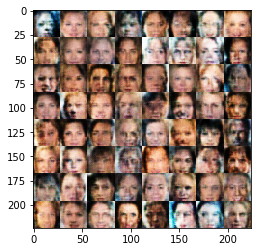

Epoch 1/1... Discriminator Loss: 0.5973... Generator Loss: 1.1716
Epoch 1/1... Discriminator Loss: 0.4845... Generator Loss: 1.5374
Epoch 1/1... Discriminator Loss: 0.4237... Generator Loss: 1.6847
Epoch 1/1... Discriminator Loss: 0.4988... Generator Loss: 1.3649
Epoch 1/1... Discriminator Loss: 1.3865... Generator Loss: 0.3909
Epoch 1/1... Discriminator Loss: 0.3979... Generator Loss: 1.9659
Epoch 1/1... Discriminator Loss: 0.5625... Generator Loss: 1.1755
Epoch 1/1... Discriminator Loss: 0.2877... Generator Loss: 2.0553
Epoch 1/1... Discriminator Loss: 0.4462... Generator Loss: 2.2599
Epoch 1/1... Discriminator Loss: 0.6524... Generator Loss: 2.2396


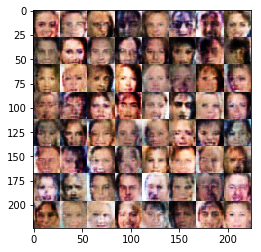

Epoch 1/1... Discriminator Loss: 0.3740... Generator Loss: 2.3039
Epoch 1/1... Discriminator Loss: 0.3433... Generator Loss: 1.9694
Epoch 1/1... Discriminator Loss: 0.4037... Generator Loss: 1.5057
Epoch 1/1... Discriminator Loss: 0.4456... Generator Loss: 1.9732
Epoch 1/1... Discriminator Loss: 0.5616... Generator Loss: 1.1613
Epoch 1/1... Discriminator Loss: 0.3700... Generator Loss: 2.0389
Epoch 1/1... Discriminator Loss: 0.4779... Generator Loss: 1.4431
Epoch 1/1... Discriminator Loss: 0.5739... Generator Loss: 2.7542
Epoch 1/1... Discriminator Loss: 0.6359... Generator Loss: 1.0815
Epoch 1/1... Discriminator Loss: 0.4910... Generator Loss: 2.3686


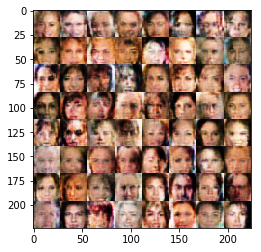

Epoch 1/1... Discriminator Loss: 0.4744... Generator Loss: 1.8058
Epoch 1/1... Discriminator Loss: 0.4463... Generator Loss: 1.7247
Epoch 1/1... Discriminator Loss: 0.4396... Generator Loss: 1.8667
Epoch 1/1... Discriminator Loss: 0.3803... Generator Loss: 1.7383
Epoch 1/1... Discriminator Loss: 0.8462... Generator Loss: 0.9857
Epoch 1/1... Discriminator Loss: 0.4954... Generator Loss: 1.3771
Epoch 1/1... Discriminator Loss: 0.2502... Generator Loss: 2.0819
Epoch 1/1... Discriminator Loss: 0.4136... Generator Loss: 1.7086
Epoch 1/1... Discriminator Loss: 0.3302... Generator Loss: 2.4438
Epoch 1/1... Discriminator Loss: 0.5260... Generator Loss: 1.9683


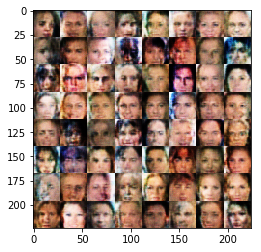

Epoch 1/1... Discriminator Loss: 0.5208... Generator Loss: 1.6560
Epoch 1/1... Discriminator Loss: 0.3911... Generator Loss: 2.0207
Epoch 1/1... Discriminator Loss: 0.3600... Generator Loss: 2.1720
Epoch 1/1... Discriminator Loss: 0.4313... Generator Loss: 2.5075
Epoch 1/1... Discriminator Loss: 0.4944... Generator Loss: 1.8494
Epoch 1/1... Discriminator Loss: 0.4888... Generator Loss: 1.5345
Epoch 1/1... Discriminator Loss: 0.6036... Generator Loss: 1.3660
Epoch 1/1... Discriminator Loss: 0.5002... Generator Loss: 1.4008
Epoch 1/1... Discriminator Loss: 0.6219... Generator Loss: 1.0160
Epoch 1/1... Discriminator Loss: 0.3919... Generator Loss: 2.1107


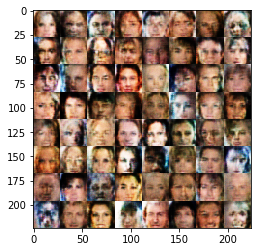

Epoch 1/1... Discriminator Loss: 0.4549... Generator Loss: 1.6730
Epoch 1/1... Discriminator Loss: 0.3004... Generator Loss: 1.9077
Epoch 1/1... Discriminator Loss: 0.4019... Generator Loss: 1.9683
Epoch 1/1... Discriminator Loss: 0.5316... Generator Loss: 1.1675
Epoch 1/1... Discriminator Loss: 0.4050... Generator Loss: 1.9812
Epoch 1/1... Discriminator Loss: 0.4812... Generator Loss: 1.8266
Epoch 1/1... Discriminator Loss: 0.4180... Generator Loss: 2.2610
Epoch 1/1... Discriminator Loss: 0.3996... Generator Loss: 1.8414
Epoch 1/1... Discriminator Loss: 0.3492... Generator Loss: 2.0113
Epoch 1/1... Discriminator Loss: 0.4336... Generator Loss: 1.6123


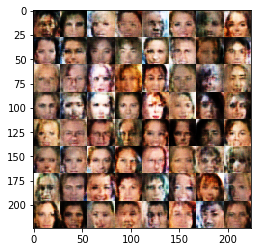

Epoch 1/1... Discriminator Loss: 0.4309... Generator Loss: 1.6575
Epoch 1/1... Discriminator Loss: 0.4702... Generator Loss: 1.4320
Epoch 1/1... Discriminator Loss: 0.3928... Generator Loss: 2.0510
Epoch 1/1... Discriminator Loss: 0.4491... Generator Loss: 1.5419
Epoch 1/1... Discriminator Loss: 0.4006... Generator Loss: 2.0490
Epoch 1/1... Discriminator Loss: 0.4252... Generator Loss: 2.2288
Epoch 1/1... Discriminator Loss: 0.3840... Generator Loss: 1.7921
Epoch 1/1... Discriminator Loss: 0.4666... Generator Loss: 1.5364
Epoch 1/1... Discriminator Loss: 0.8764... Generator Loss: 0.7110
Epoch 1/1... Discriminator Loss: 0.3251... Generator Loss: 2.1626


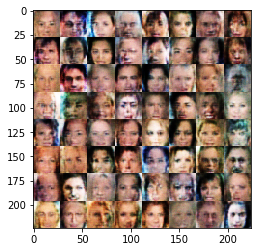

Epoch 1/1... Discriminator Loss: 0.7320... Generator Loss: 0.8825
Epoch 1/1... Discriminator Loss: 0.3529... Generator Loss: 2.1289
Epoch 1/1... Discriminator Loss: 0.3142... Generator Loss: 2.4981
Epoch 1/1... Discriminator Loss: 0.5339... Generator Loss: 1.2912
Epoch 1/1... Discriminator Loss: 0.4727... Generator Loss: 1.8604
Epoch 1/1... Discriminator Loss: 0.3811... Generator Loss: 2.1162
Epoch 1/1... Discriminator Loss: 0.4822... Generator Loss: 1.5453
Epoch 1/1... Discriminator Loss: 0.2123... Generator Loss: 2.8532
Epoch 1/1... Discriminator Loss: 0.3550... Generator Loss: 1.9997
Epoch 1/1... Discriminator Loss: 0.3325... Generator Loss: 1.6894


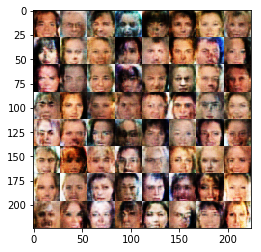

Epoch 1/1... Discriminator Loss: 0.3296... Generator Loss: 1.9319
Epoch 1/1... Discriminator Loss: 0.6236... Generator Loss: 1.0689
Epoch 1/1... Discriminator Loss: 0.4666... Generator Loss: 1.3980
Epoch 1/1... Discriminator Loss: 0.4569... Generator Loss: 1.4324
Epoch 1/1... Discriminator Loss: 0.3029... Generator Loss: 1.9281
Epoch 1/1... Discriminator Loss: 0.5805... Generator Loss: 2.0831
Epoch 1/1... Discriminator Loss: 0.5058... Generator Loss: 1.3729
Epoch 1/1... Discriminator Loss: 0.2921... Generator Loss: 2.1833
Epoch 1/1... Discriminator Loss: 0.4619... Generator Loss: 1.3685
Epoch 1/1... Discriminator Loss: 0.3063... Generator Loss: 2.1002


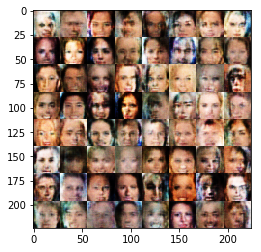

Epoch 1/1... Discriminator Loss: 0.3359... Generator Loss: 2.3332
Epoch 1/1... Discriminator Loss: 0.4212... Generator Loss: 1.9523
Epoch 1/1... Discriminator Loss: 0.3453... Generator Loss: 1.7277
Epoch 1/1... Discriminator Loss: 0.2731... Generator Loss: 2.2233
Epoch 1/1... Discriminator Loss: 0.5210... Generator Loss: 1.2249
Epoch 1/1... Discriminator Loss: 0.5556... Generator Loss: 2.1409
Epoch 1/1... Discriminator Loss: 0.3740... Generator Loss: 1.7800
Epoch 1/1... Discriminator Loss: 0.2895... Generator Loss: 2.2899
Epoch 1/1... Discriminator Loss: 0.4998... Generator Loss: 1.2635
Epoch 1/1... Discriminator Loss: 1.2479... Generator Loss: 0.5202


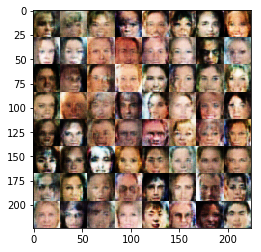

Epoch 1/1... Discriminator Loss: 0.2935... Generator Loss: 2.3144
Epoch 1/1... Discriminator Loss: 0.4087... Generator Loss: 2.0114
Epoch 1/1... Discriminator Loss: 0.3649... Generator Loss: 1.6589
Epoch 1/1... Discriminator Loss: 0.3454... Generator Loss: 2.0206
Epoch 1/1... Discriminator Loss: 0.3028... Generator Loss: 2.1220
Epoch 1/1... Discriminator Loss: 0.1989... Generator Loss: 2.5505
Epoch 1/1... Discriminator Loss: 0.4465... Generator Loss: 1.4334
Epoch 1/1... Discriminator Loss: 0.3117... Generator Loss: 2.0976
Epoch 1/1... Discriminator Loss: 0.6228... Generator Loss: 1.3967
Epoch 1/1... Discriminator Loss: 0.4158... Generator Loss: 2.8308


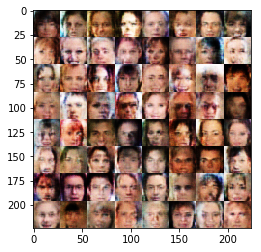

Epoch 1/1... Discriminator Loss: 0.2726... Generator Loss: 2.0240
Epoch 1/1... Discriminator Loss: 0.2066... Generator Loss: 2.4000
Epoch 1/1... Discriminator Loss: 0.2549... Generator Loss: 2.3555
Epoch 1/1... Discriminator Loss: 0.3137... Generator Loss: 1.8885
Epoch 1/1... Discriminator Loss: 1.0294... Generator Loss: 2.7610
Epoch 1/1... Discriminator Loss: 0.9281... Generator Loss: 0.6588
Epoch 1/1... Discriminator Loss: 0.5229... Generator Loss: 2.3448
Epoch 1/1... Discriminator Loss: 0.4630... Generator Loss: 2.0808
Epoch 1/1... Discriminator Loss: 0.1536... Generator Loss: 2.9118
Epoch 1/1... Discriminator Loss: 0.2828... Generator Loss: 1.9403


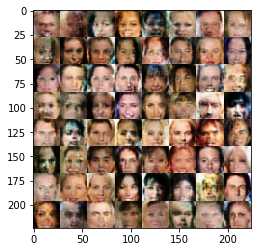

Epoch 1/1... Discriminator Loss: 0.3027... Generator Loss: 2.1918
Epoch 1/1... Discriminator Loss: 0.3105... Generator Loss: 1.8971
Epoch 1/1... Discriminator Loss: 0.4360... Generator Loss: 1.5425
Epoch 1/1... Discriminator Loss: 0.8526... Generator Loss: 0.7606
Epoch 1/1... Discriminator Loss: 0.2600... Generator Loss: 2.6036
Epoch 1/1... Discriminator Loss: 0.3906... Generator Loss: 1.4859
Epoch 1/1... Discriminator Loss: 0.6970... Generator Loss: 1.0369
Epoch 1/1... Discriminator Loss: 0.4948... Generator Loss: 1.3758
Epoch 1/1... Discriminator Loss: 0.1869... Generator Loss: 2.6439
Epoch 1/1... Discriminator Loss: 0.1926... Generator Loss: 2.1012


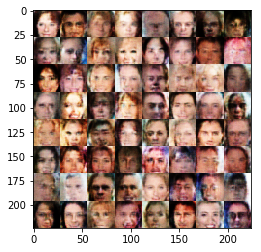

Epoch 1/1... Discriminator Loss: 0.8141... Generator Loss: 0.7653
Epoch 1/1... Discriminator Loss: 0.2261... Generator Loss: 2.4128
Epoch 1/1... Discriminator Loss: 0.3652... Generator Loss: 2.1883
Epoch 1/1... Discriminator Loss: 0.3948... Generator Loss: 1.9436
Epoch 1/1... Discriminator Loss: 0.4790... Generator Loss: 1.3094
Epoch 1/1... Discriminator Loss: 0.9249... Generator Loss: 0.6953
Epoch 1/1... Discriminator Loss: 0.6946... Generator Loss: 0.9016
Epoch 1/1... Discriminator Loss: 0.3615... Generator Loss: 1.6456
Epoch 1/1... Discriminator Loss: 0.5561... Generator Loss: 1.1232
Epoch 1/1... Discriminator Loss: 0.3351... Generator Loss: 1.8979


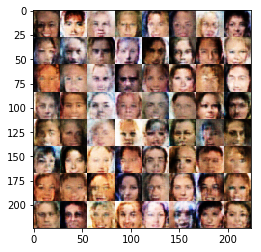

Epoch 1/1... Discriminator Loss: 0.2839... Generator Loss: 2.1448
Epoch 1/1... Discriminator Loss: 0.3997... Generator Loss: 2.3975
Epoch 1/1... Discriminator Loss: 0.3783... Generator Loss: 1.7519
Epoch 1/1... Discriminator Loss: 0.5670... Generator Loss: 1.2679
Epoch 1/1... Discriminator Loss: 0.7432... Generator Loss: 1.0478
Epoch 1/1... Discriminator Loss: 0.2613... Generator Loss: 2.8948
Epoch 1/1... Discriminator Loss: 0.3609... Generator Loss: 1.7600
Epoch 1/1... Discriminator Loss: 0.2679... Generator Loss: 2.2639
Epoch 1/1... Discriminator Loss: 0.6272... Generator Loss: 1.2998
Epoch 1/1... Discriminator Loss: 0.5562... Generator Loss: 1.3032


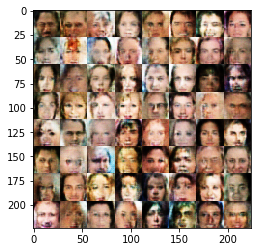

Epoch 1/1... Discriminator Loss: 0.3156... Generator Loss: 2.4577
Epoch 1/1... Discriminator Loss: 0.3146... Generator Loss: 1.9618
Epoch 1/1... Discriminator Loss: 0.3494... Generator Loss: 2.0368
Epoch 1/1... Discriminator Loss: 0.3152... Generator Loss: 1.9357
Epoch 1/1... Discriminator Loss: 0.4335... Generator Loss: 1.6301
Epoch 1/1... Discriminator Loss: 0.2605... Generator Loss: 3.0548
Epoch 1/1... Discriminator Loss: 0.5507... Generator Loss: 2.1496
Epoch 1/1... Discriminator Loss: 0.4687... Generator Loss: 1.8353
Epoch 1/1... Discriminator Loss: 0.2603... Generator Loss: 2.1715
Epoch 1/1... Discriminator Loss: 0.4688... Generator Loss: 1.7990


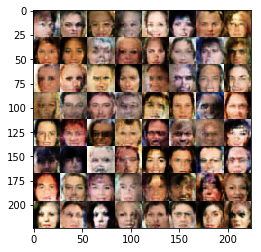

Epoch 1/1... Discriminator Loss: 0.3980... Generator Loss: 1.9419
Epoch 1/1... Discriminator Loss: 0.4129... Generator Loss: 1.6424
Epoch 1/1... Discriminator Loss: 0.3182... Generator Loss: 2.7538
Epoch 1/1... Discriminator Loss: 0.2844... Generator Loss: 2.1957
Epoch 1/1... Discriminator Loss: 0.3202... Generator Loss: 1.8892
Epoch 1/1... Discriminator Loss: 0.3674... Generator Loss: 1.9769
Epoch 1/1... Discriminator Loss: 0.3967... Generator Loss: 2.1301
Epoch 1/1... Discriminator Loss: 0.3802... Generator Loss: 1.5785
Epoch 1/1... Discriminator Loss: 0.6635... Generator Loss: 0.9847
Epoch 1/1... Discriminator Loss: 0.3137... Generator Loss: 2.1694


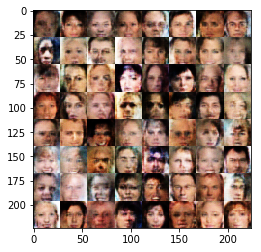

Epoch 1/1... Discriminator Loss: 0.8836... Generator Loss: 0.8291
Epoch 1/1... Discriminator Loss: 0.2995... Generator Loss: 2.7601
Epoch 1/1... Discriminator Loss: 0.3701... Generator Loss: 1.7651
Epoch 1/1... Discriminator Loss: 0.4303... Generator Loss: 2.1042
Epoch 1/1... Discriminator Loss: 0.5549... Generator Loss: 1.2184
Epoch 1/1... Discriminator Loss: 0.1708... Generator Loss: 3.0407
Epoch 1/1... Discriminator Loss: 0.3460... Generator Loss: 1.9272
Epoch 1/1... Discriminator Loss: 0.4079... Generator Loss: 1.8169
Epoch 1/1... Discriminator Loss: 0.3022... Generator Loss: 2.5382
Epoch 1/1... Discriminator Loss: 0.3370... Generator Loss: 1.7348


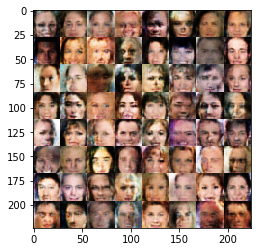

Epoch 1/1... Discriminator Loss: 0.4141... Generator Loss: 1.7052
Epoch 1/1... Discriminator Loss: 0.6414... Generator Loss: 0.9943
Epoch 1/1... Discriminator Loss: 0.3043... Generator Loss: 2.6835
Epoch 1/1... Discriminator Loss: 0.3631... Generator Loss: 2.2439
Epoch 1/1... Discriminator Loss: 0.3593... Generator Loss: 1.7208
Epoch 1/1... Discriminator Loss: 0.5180... Generator Loss: 1.4523


In [38]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.